In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import model_selection as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

## Preparing columns to add to mainframe

### Preparing main dataframe

In [2]:
df2 = pd.read_csv("countries_of_the_world_edit.csv")

In [3]:
df2["Country"] = df2["Country"].str.rstrip()

In [4]:
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,22.46,3.27,1.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,8.71,6.25,1.000,0.000,0.000


In [5]:
#df2.to_csv("countries_of_the_world_edit_2.csv")

### Preparing Life Expectancy Column


In [6]:
df_life = pd.read_csv("./getdata/healthy_life_expectancy/Life Expectancy Data.csv")

In [7]:
df_life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df_life.columns = df_life.columns.str.strip()
df_life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
df_life2 = df_life[["Country","Year","Life expectancy"]]

In [10]:
df_life3 = df_life2.groupby("Country").mean()

In [11]:
df_life3 = df_life3.drop("Year",axis = 1)

In [12]:
#df_life3.to_csv("Life_expectancy_column.csv")

### Preparing Unemployment column

In [13]:
df_employ = pd.read_csv("./getdata/Freedom/unemployment.csv")
df_employ.columns = df_employ.columns.str.strip()
df_employ.columns = ["Country","unemployment_percentage"]

In [14]:
df_employ

,Country,unemployment_percentage
0,Cocos (Keeling) Islands,0.1
1,Cambodia,0.3
2,Qatar,0.6
3,Thailand,0.7
4,Gibraltar,1.0
...,...,...
212,Senegal,48.0
213,Syria,50.0
214,Djibouti,60.0
215,Burkina Faso,77.0


In [15]:
#df_employ.to_csv("Employment_column.csv",index = False)

### Preparing Corruption Perceptions Column

In [16]:
df_cpi = pd.read_csv("./getdata/corruption/merged_cpi_data.csv")

In [17]:
df_cpi.head()

,Year,Country,CPI Score,Rank,Number of Sources,Minimum score,Maximum score,Standard Error,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),...,WJP,ISO3,Region,WB Code,OECD,G20,BRICS,EU,Arab states,IFS Code
0,2010,Denmark,93.0,1,6,89.0,95.0,2.0,94.0,91.0,...,NaN,DNK,WE/EU,DNK,y,NaN,NaN,y,NaN,128.0
1,2010,New Zealand,93.0,1,6,89.0,95.0,2.0,95.0,92.0,...,NaN,NZL,AP,NZL,y,NaN,NaN,NaN,NaN,196.0
2,2010,Singapore,93.0,1,9,89.0,95.0,2.0,94.0,92.0,...,NaN,SGP,AP,SGP,NaN,NaN,NaN,NaN,NaN,576.0
3,2010,Finland,92.0,4,6,89.0,95.0,2.0,93.0,91.0,...,NaN,FIN,WE/EU,FIN,y,NaN,NaN,y,NaN,172.0
4,2010,Sweden,92.0,4,6,89.0,95.0,2.0,94.0,91.0,...,NaN,SWE,WE/EU,SWE,y,NaN,NaN,y,NaN,144.0


In [18]:
df_cpi2 = df_cpi[["Country","CPI Score"]]

In [19]:
df_cpi3 = df_cpi2.groupby("Country").mean()

In [20]:
df_cpi3

,CPI Score
Country,
Afghanistan,13.017093
Albania,34.452946
Algeria,33.704377
Angola,20.005035
Argentina,35.396074
...,...
Venezuela,18.289497
Vietnam,31.764383
Yemen,17.980347


In [21]:
#df_cpi3.to_csv("cpi_column.csv")

## Merging all datasets into one

### Obtaining data

In [25]:
df_codw = pd.read_csv("countries_of_the_world_edit_2.csv")
df_cpi = pd.read_csv("cpi_column.csv")
df_unemp = pd.read_csv("Employment_column.csv")
df_life = pd.read_csv("Life_expectancy_column.csv")
df_whr = pd.read_csv("../first part/merged_all_5_years.csv")

"""
codw -> Countries of the world
cpi -> Corruption perceptions
unemp -> Unemployement rates
life -> Healthy life expectancy
whr -> World Happiness Report

""";

In [26]:
df_codw = df_codw.drop("Unnamed: 0",axis = 1)

In [27]:
df_codw.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,22.46,3.27,1.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,8.71,6.25,1.000,0.000,0.000


In [28]:
df_codw = df_codw.drop("Region",axis = 1)

In [29]:
df_codw

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.070000,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.520000,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.000000,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
3,American Samoa,57794,199,290.4,58.29,-20.71,9.270000,8000.0,97.0,259.5,10.00,15.00,75.00,22.46,3.27,1.000,0.000,0.000
4,Andorra,71201,468,152.1,0.00,6.60,4.050000,19000.0,100.0,497.2,2.22,0.00,97.78,8.71,6.25,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,2460492,5860,419.9,0.00,2.98,19.620000,800.0,0.0,145.2,16.90,18.97,64.13,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,273008,266000,1.0,0.42,0.00,35.506964,0.0,0.0,0.0,0.02,0.00,99.98,0.00,0.00,1.000,0.000,0.400
224,Yemen,21456188,527970,40.6,0.36,0.00,61.500000,800.0,50.2,37.2,2.78,0.24,96.98,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.290000,800.0,80.6,8.2,7.08,0.03,92.90,41.00,19.93,0.220,0.290,0.489


### Merging

In [30]:
merged1 = pd.merge(df_codw,df_life,on = "Country",how = "inner")
merged2 = pd.merge(merged1,df_cpi,on = "Country",how = "inner")
merged3 = pd.merge(merged2,df_unemp,on = "Country",how = "inner")
merged4 = pd.merge(merged3,df_whr,on = "Country",how = "inner")

In [31]:
merged4 = merged4.sort_values(by = "Happiness Score",ascending = False,ignore_index = True)

In [32]:
merged4

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Unnamed: 0,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Denmark,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,...,0,Europe,1,7.54600,1.396729,1.447688,0.865249,0.625959,0.363876,0.384374
1,Norway,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,...,1,Europe,2,7.54100,1.519381,1.431075,0.873333,0.638049,0.328360,0.344581
2,Finland,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,...,2,Europe,3,7.53780,1.356960,1.434429,0.873836,0.621536,0.284849,0.331408
3,Switzerland,7523934,41290,182.2,0.00,4.05,4.39,32700.0,99.0,680.9,...,3,Europe,4,7.51140,1.472164,1.417332,0.928318,0.620642,0.328272,0.328923
4,Iceland,299388,103000,2.9,4.83,2.38,3.31,30900.0,99.9,647.7,...,4,Europe,5,7.51100,1.386523,1.492813,0.917744,0.618035,0.294748,0.264521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,...,150,Africa,151,3.62580,0.489313,0.865448,0.365440,0.244175,0.086517,0.077457
138,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,151,Asia,152,3.51280,0.357113,0.409753,0.254707,0.117924,0.165836,0.159988
139,Tanzania,37445392,945087,39.6,0.15,-2.06,98.54,600.0,78.2,4.0,...,152,Africa,153,3.46600,0.439777,0.939380,0.396732,0.386880,0.201743,0.193705
140,Rwanda,8648248,26338,328.4,0.00,0.00,91.23,1300.0,70.4,2.7,...,153,Africa,154,3.43860,0.322057,0.788453,0.417543,0.581611,0.345375,0.354404


In [33]:
merged4 = merged4.drop("Unnamed: 0",axis = 1)

### Saving

In [ ]:
#merged4.to_csv("project.csv",index = False)

## Machine Learning and Visualization

### Obtaining the data

In [34]:
df = pd.read_csv("project.csv")

In [37]:
df = df.sort_values("Happiness Score",ascending = False, ignore_index = True)
df

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,unemployment_percentage,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Denmark,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,...,5.8,Europe,1,7.54600,1.396729,1.447688,0.865249,0.625959,0.363876,0.384374
1,Norway,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,...,4.0,Europe,2,7.54100,1.519381,1.431075,0.873333,0.638049,0.328360,0.344581
2,Finland,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,...,8.7,Europe,3,7.53780,1.356960,1.434429,0.873836,0.621536,0.284849,0.331408
3,Switzerland,7523934,41290,182.2,0.00,4.05,4.39,32700.0,99.0,680.9,...,3.0,Europe,4,7.51140,1.472164,1.417332,0.928318,0.620642,0.328272,0.328923
4,Iceland,299388,103000,2.9,4.83,2.38,3.31,30900.0,99.9,647.7,...,2.8,Europe,5,7.51100,1.386523,1.492813,0.917744,0.618035,0.294748,0.264521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,...,27.0,Africa,151,3.62580,0.489313,0.865448,0.365440,0.244175,0.086517,0.077457
138,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,35.0,Asia,152,3.51280,0.357113,0.409753,0.254707,0.117924,0.165836,0.159988
139,Tanzania,37445392,945087,39.6,0.15,-2.06,98.54,600.0,78.2,4.0,...,10.3,Africa,153,3.46600,0.439777,0.939380,0.396732,0.386880,0.201743,0.193705
140,Rwanda,8648248,26338,328.4,0.00,0.00,91.23,1300.0,70.4,2.7,...,2.7,Africa,154,3.43860,0.322057,0.788453,0.417543,0.581611,0.345375,0.354404


In [38]:
to_remove = ['Happiness Rank','GDP per capita','Healthy life expectancy','Perceptions of corruption','Region','Country']

In [39]:
df = df.drop(to_remove,axis = 1)
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Agriculture,Industry,Service,Life expectancy,CPI Score,unemployment_percentage,Happiness Score,Social support,Freedom to make life choices,Generosity
0,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,54.02,...,0.018,0.246,0.735,79.25625,90.392080,5.8,7.54600,1.447688,0.625959,0.363876
1,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,...,0.021,0.415,0.564,81.79375,85.889854,4.0,7.54100,1.431075,0.638049,0.328360
2,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,7.19,...,0.028,0.295,0.676,80.71250,88.903927,8.7,7.53780,1.434429,0.621536,0.284849
3,7523934,41290,182.2,0.00,4.05,4.39,32700.0,99.0,680.9,10.42,...,0.015,0.340,0.645,82.33125,85.901674,3.0,7.51140,1.417332,0.620642,0.328272
4,299388,103000,2.9,4.83,2.38,3.31,30900.0,99.9,647.7,0.07,...,0.086,0.150,0.765,82.44375,79.474027,2.8,7.51100,1.492813,0.618035,0.294748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,...,0.135,0.472,0.393,63.86250,17.980347,27.0,3.62580,0.865448,0.244175,0.086517
138,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0.380,0.240,0.380,58.19375,13.017093,35.0,3.51280,0.409753,0.117924,0.165836
139,37445392,945087,39.6,0.15,-2.06,98.54,600.0,78.2,4.0,4.52,...,0.432,0.172,0.396,56.00625,32.650526,10.3,3.46600,0.939380,0.386880,0.201743
140,8648248,26338,328.4,0.00,0.00,91.23,1300.0,70.4,2.7,40.54,...,0.401,0.229,0.370,59.31250,51.683419,2.7,3.43860,0.788453,0.581611,0.345375


## Visualization

### Correlation Matrix

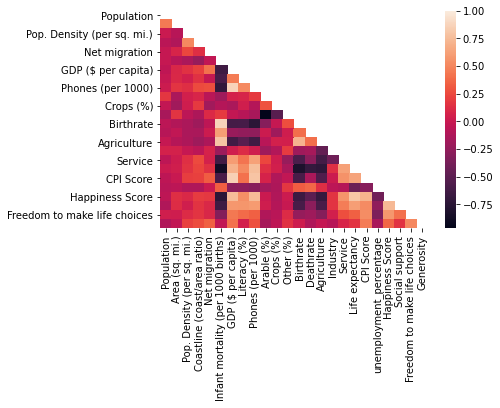

In [44]:
corr_mat = df.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, mask=mask);

### Checking the correlation between two variables

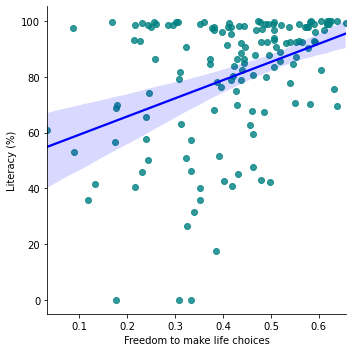

In [45]:
sns.lmplot(x = "Freedom to make life choices",y = "Literacy (%)",
           line_kws={'color': 'blue'},
           scatter_kws={'color': 'teal'},
           data = df);

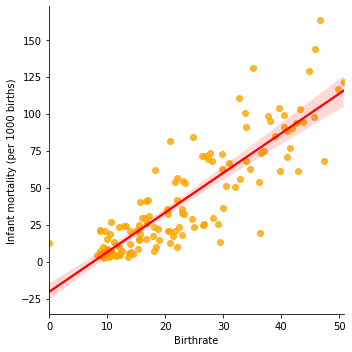

In [46]:
sns.lmplot(x = "Birthrate",y = "Infant mortality (per 1000 births)",line_kws={'color': 'red'},
           scatter_kws={'color': 'orange'},
           data = df);

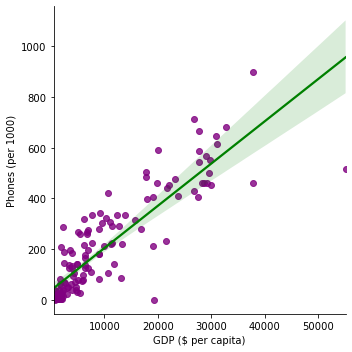

In [47]:
sns.lmplot(x = "GDP ($ per capita)",y = "Phones (per 1000)",line_kws={'color': 'green'},
           scatter_kws={'color': 'purple'},
           data = df);

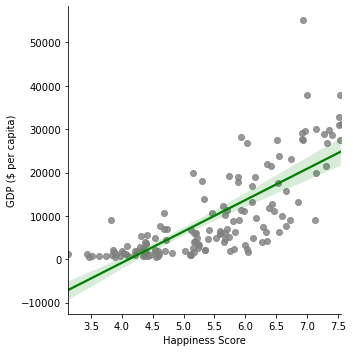

In [48]:
sns.lmplot(x = "Happiness Score",y = "GDP ($ per capita)",line_kws={'color': 'green'},
           scatter_kws={'color': 'gray'},
           data = df);

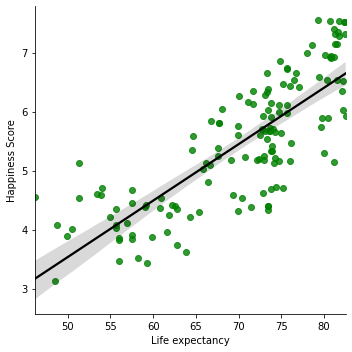

In [49]:
sns.lmplot(x = "Life expectancy",y = "Happiness Score",line_kws={'color': 'black'},
           scatter_kws={'color': 'green'},
           data = df);

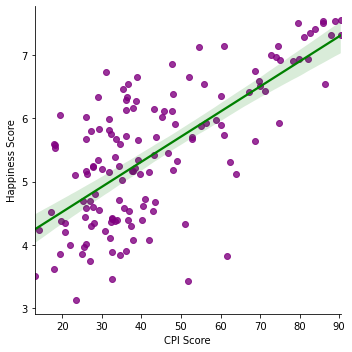

In [50]:
sns.lmplot(x = "CPI Score",y = "Happiness Score",line_kws={'color': 'green'},
           scatter_kws={'color': 'purple'},
           data = df);

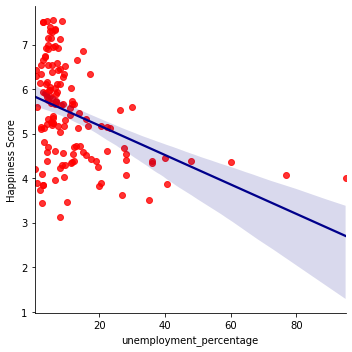

In [52]:
sns.lmplot(x = "unemployment_percentage",y = "Happiness Score",line_kws={'color': 'darkblue'},
           scatter_kws={'color': 'red'},
           data = df);

## Machine Learning

### Dividing the data into "Attributes" and "Labels"

In [53]:
X_col = list(df.columns)
X_col.remove("Happiness Score")
y_col = ["Happiness Score"]
X = df[X_col].values
y = df[y_col].values

### Splitting the data into "Train" and "Test" 

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Linear Regression

#### Fitting the train data into Regression model

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train);

#### Constructing y_true and y_pred (observed and predicted)

In [57]:
y_pred = regressor.predict(X_test)
y_true = y_test

#### Function to calculate pearson correlation coefficent

In [58]:
def calc_pearson(observed, predicted):
    n = len(observed)
    sum_x = 0
    sum_sqr_x = 0
    sum_y = 0
    sum_sqr_y = 0
    sum_xy = 0
    for i in observed:
        sum_x += i 
        sum_sqr_x += i**2
    for i in predicted:
        sum_y += i
        sum_sqr_y += i**2
    for i in range(n):
        sum_xy += observed[i]*predicted[i]
        
    pearson_r = (sum_xy -(n*(sum_x/n)*(sum_y/n))) / ((sum_sqr_x - n*(sum_x/n)**2) * (sum_sqr_y - n*(sum_y/n)**2))**0.5
    
    
    return pearson_r

#### Calculating pearson correlation coefficent, MAE, MSE , RMSE

In [59]:
calc_pearson(y_true,y_pred)[0]

0.8650521220357712

In [60]:
print('Mean Absolute Error:', sk.metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', sk.metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.455993528658897
Mean Squared Error: 0.29880729521145893
Root Mean Squared Error: 0.5466326876536556


#### Actual vs Predicted Barplot

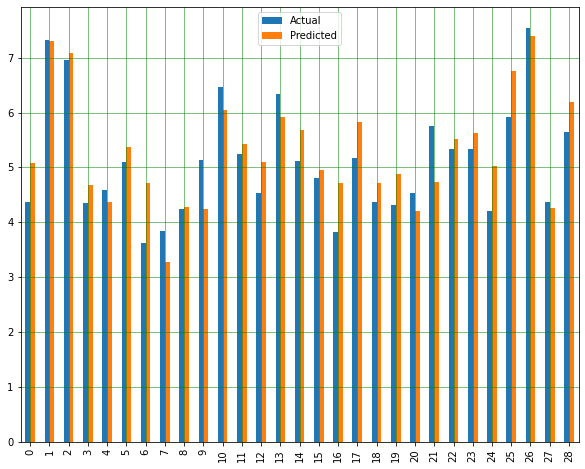

In [61]:
actual = pd.Series(name = "Actual",data = y_true.reshape(len(y_true),))
predicted = pd.Series(name = "Predicted",data = y_pred.reshape(len(y_pred),))

df_bar = pd.DataFrame({"Actual": actual, "Predicted": predicted})

df_bar.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Observed vs Predicted Plot

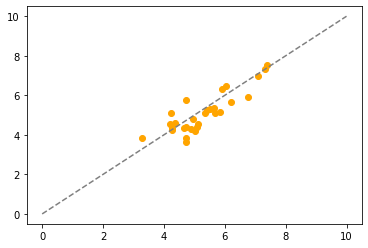

In [62]:
plt.scatter(y_pred,y_test,  color='orange')
plt.plot([0,10], [0,10],'--', color = 'gray')
plt.show()

### Decision Tree Regression

In [64]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

y_true = y_test

#### Pearson Coorelation Coefficent, MAE, MSE, RMSE

In [74]:
print("Pearson Coorelation Coefficent: ",calc_pearson(y_true,y_pred)[0])
print('Mean Absolute Error:', sk.metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', sk.metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))

Pearson Coorelation Coefficent:  0.7982292033662802
Mean Absolute Error: 0.5068183359860783
Mean Squared Error: 0.4261105558091453
Root Mean Squared Error: 0.6527714422438724


#### Observed vs Predicted plot

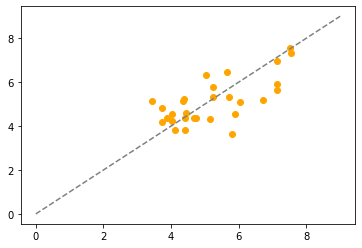

In [66]:
plt.scatter(y_pred,y_test,  color='orange')
plt.plot([0,9], [0,9],'--', color = 'gray')
plt.show()

#### Actual vs Predicted Barplot

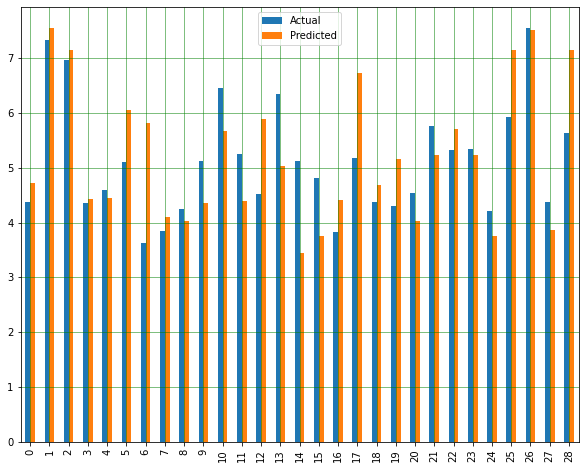

In [67]:
actual = pd.Series(name = "Actual",data = y_true.reshape(len(y_true),))
predicted = pd.Series(name = "Predicted",data = y_pred.reshape(len(y_pred),))

df_bar = pd.DataFrame({"Actual": actual, "Predicted": predicted})

df_bar.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Random Forests Regression

In [68]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

y_true = y_test

<ipython-input-68-d1c68e2efb17>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


#### Pearson Coorelation Coefficent, MAE, MSE, RMSE

In [73]:
print("Pearson Coorelation Coefficent: ",calc_pearson(y_true,y_pred)[0])
print('Mean Absolute Error:', sk.metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', sk.metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))

Pearson Coorelation Coefficent:  0.7982292033662802
Mean Absolute Error: 0.5068183359860783
Mean Squared Error: 0.4261105558091453
Root Mean Squared Error: 0.6527714422438724


#### Observed vs Predicted Plot

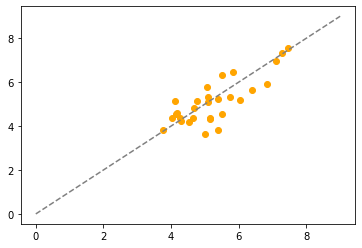

In [75]:
plt.scatter(y_pred,y_test,  color='orange')
plt.plot([0,9], [0,9],'--', color = 'gray')
plt.show()

#### Actual vs Predicted Barplot

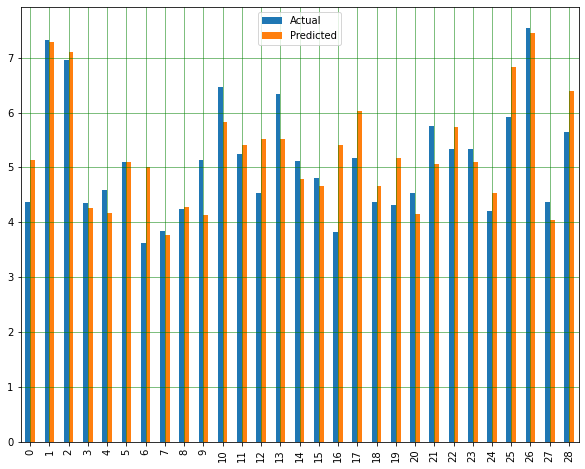

In [76]:
actual = pd.Series(name = "Actual",data = y_true.reshape(len(y_true),))
predicted = pd.Series(name = "Predicted",data = y_pred.reshape(len(y_pred),))

df_bar = pd.DataFrame({"Actual": actual, "Predicted": predicted})

df_bar.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Linear Regression with KFold

#### Applying KFold

In [77]:
splits = 10
kf = ms.KFold(n_splits= splits,shuffle=True)

X_trains = []
X_tests = []
y_trains = []
y_tests = []

for train,test in kf.split(X):
    X_Train = X[train]
    X_Test = X[test]
    
    X_trains.append(X_Train)
    X_tests.append(X_Test)

for train,test in kf.split(y):
    y_Train = y[train]
    y_Test = y[test]
    
    y_trains.append(y_Train)
    y_tests.append(y_Test)

#### Calculating Pearson Coorelation Coefficent, MAE, MSE, RMSE

In [78]:
pearsonn = 0
mae = 0
mse = 0
rmse = 0
for i in range(splits):
    X_trainee = X_trains[i]
    y_trainee = y_trains[i]
    regressor = LinearRegression()
    regressor.fit(X_trainee, y_trainee);
    X_testit = X_tests[i]
    y_testit = y_tests[i]
    
    y_predd = regressor.predict(X_testit)
    y_truee = y_testit
    
    pearsonn += calc_pearson(y_truee,y_predd)[0] / splits
    mae += sk.metrics.mean_absolute_error(y_truee, y_predd) / splits
    mse += sk.metrics.mean_squared_error(y_truee, y_predd) / splits
    rmse += np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)) / splits

In [79]:
print("Pearson Coorelation Coefficent (n_splits = {}) : {}".format(splits,pearsonn))
print('Mean Absolute Error (n_splits = {}) :'.format(splits), mae)  
print('Mean Squared Error (n_splits = {}) : '.format(splits), mse)  
print('Root Mean Squared Error (n_splits = {}) : '.format(splits), rmse)

Pearson Coorelation Coefficent (n_splits = 10) : 0.7935477689587641
Mean Absolute Error (n_splits = 10) : 0.6557670368109291
Mean Squared Error (n_splits = 10) :  0.6743113968229226
Root Mean Squared Error (n_splits = 10) :  0.6527714422438724


#### Observed vs Predicted Plots

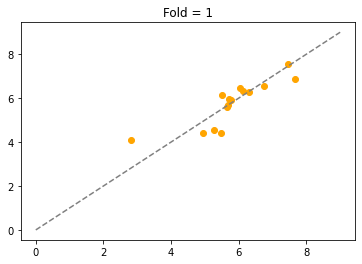

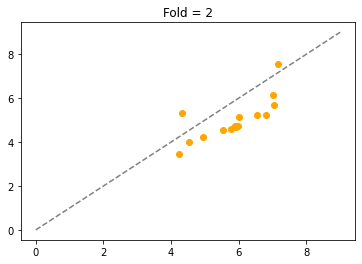

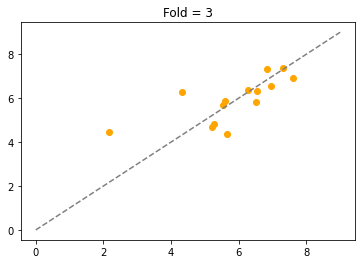

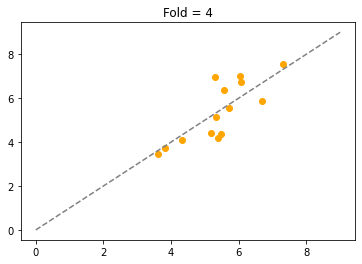

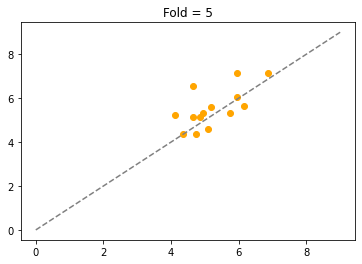

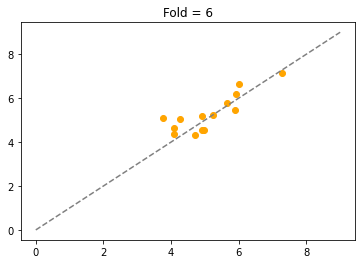

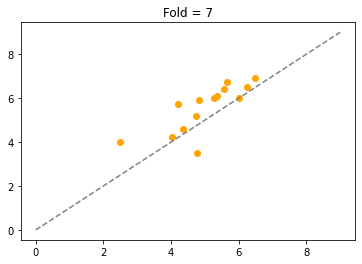

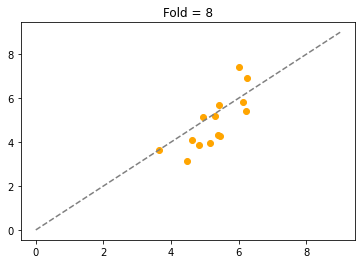

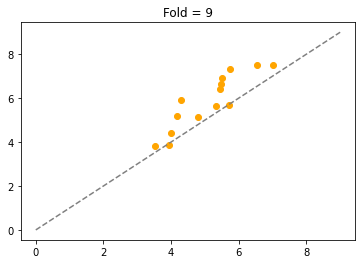

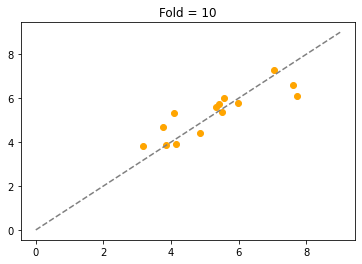

In [80]:
for i in range(splits):
    X_trainee = X_trains[i]
    y_trainee = y_trains[i]
    regressor = LinearRegression()
    regressor.fit(X_trainee, y_trainee);
    X_testit = X_tests[i]
    y_testit = y_tests[i]
    
    y_predd = regressor.predict(X_testit)
    y_truee = y_testit
    
    plt.scatter(y_predd,y_truee,  color='orange')
    plt.title("Fold = {}".format(i+1))
    plt.plot([0,9], [0,9],'--', color = 'gray')
    plt.show()

#### Actual vs Predicted Barplots

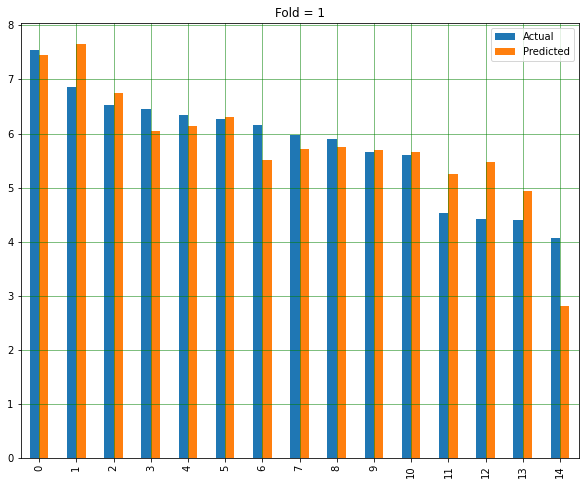

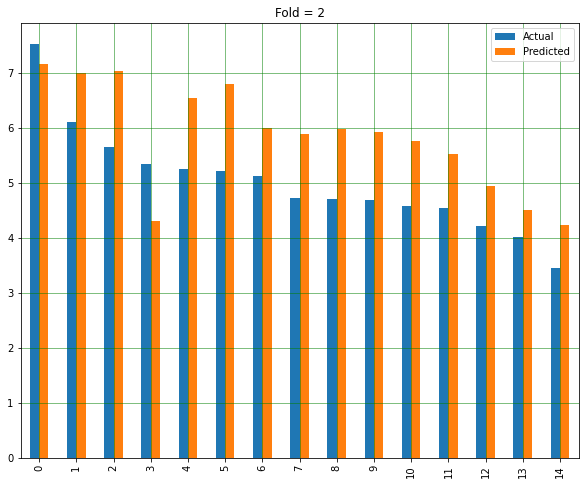

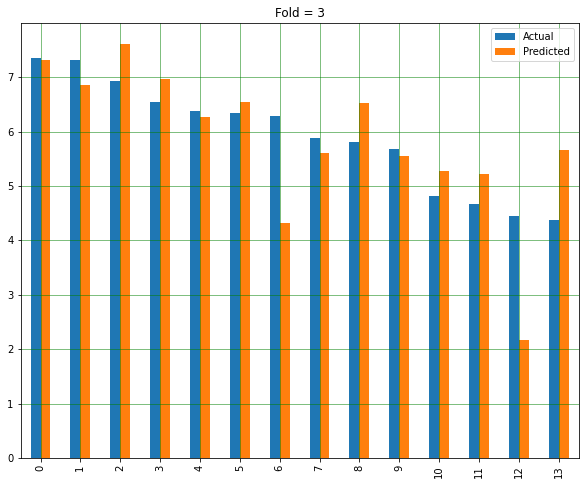

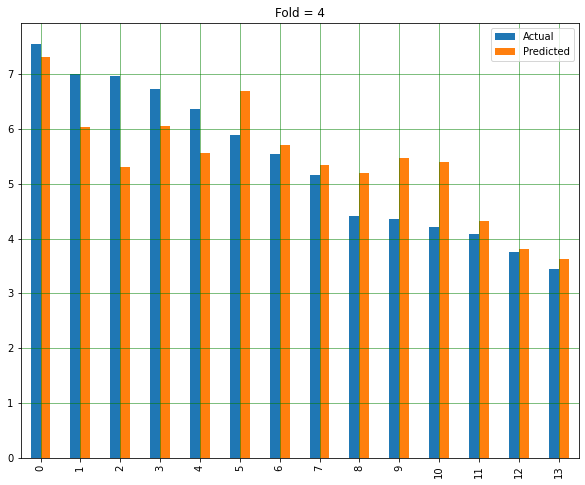

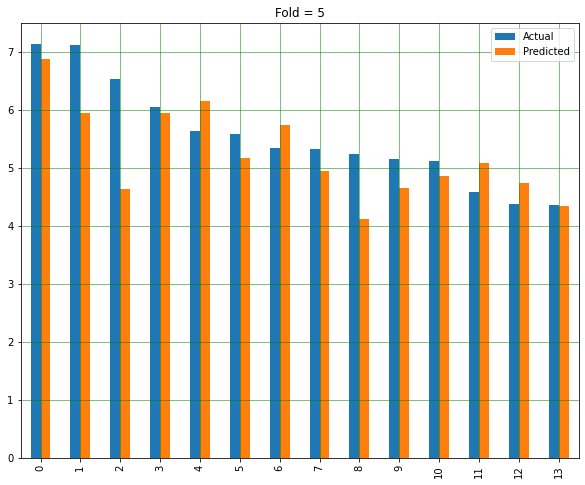

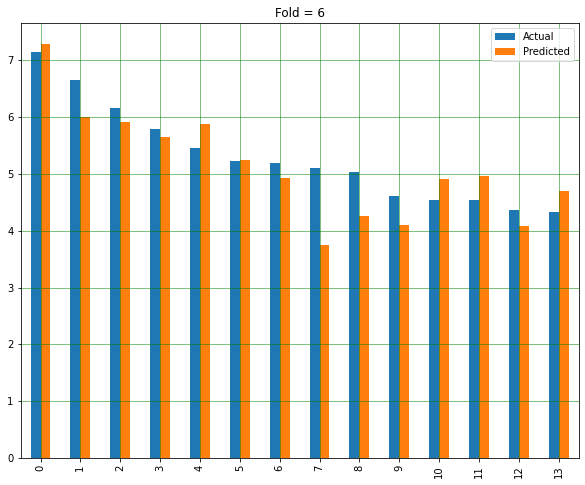

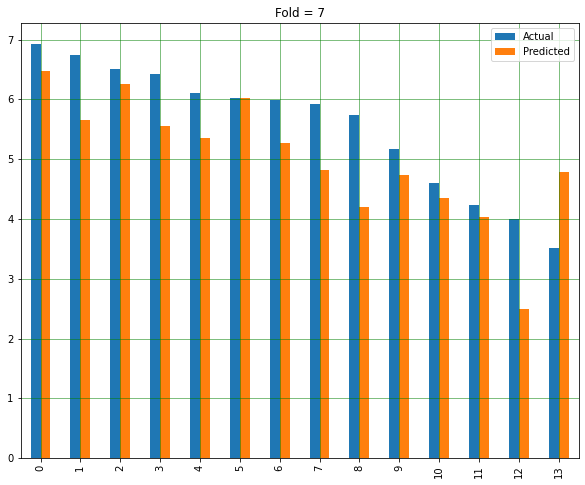

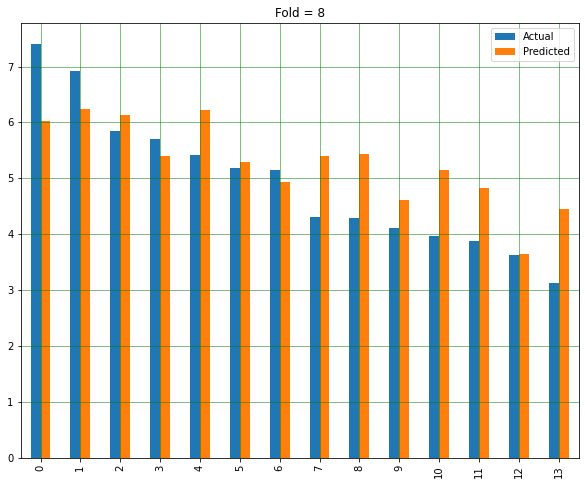

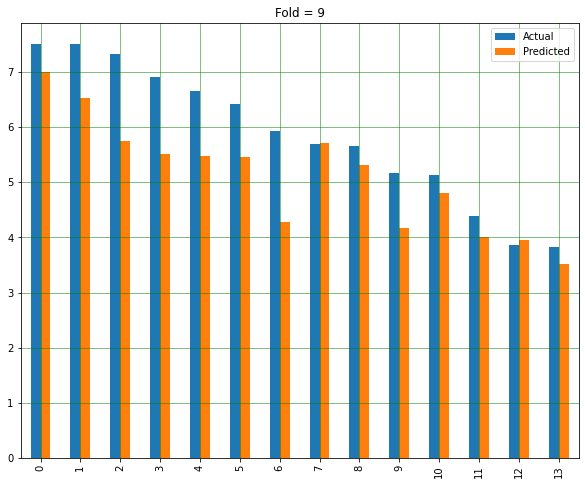

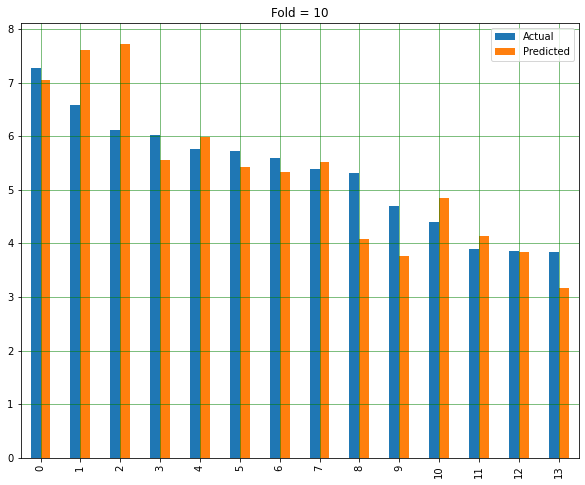

In [81]:
for i in range(splits):
    X_trainee = X_trains[i]
    y_trainee = y_trains[i]
    regressor = LinearRegression()
    regressor.fit(X_trainee, y_trainee);
    X_testit = X_tests[i]
    y_testit = y_tests[i]
    
    y_predd = regressor.predict(X_testit)
    y_truee = y_testit
    
    actual = pd.Series(name = "Actual",data = y_truee.reshape(len(y_truee),))
    predicted = pd.Series(name = "Predicted",data = y_predd.reshape(len(y_predd),))

    df_bar = pd.DataFrame({"Actual": actual, "Predicted": predicted})

    df_bar.plot(kind='bar',figsize=(10,8))
    plt.title("Fold = {}".format(i+1))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()